<a href="https://colab.research.google.com/github/nkiru-ede/nkiru_codes/blob/master/Assessment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install twython

In [ ]:
pip install nltk

In [ ]:
pip install gmplot

     |████████████████████████████████| 164 kB 5.3 MB/s 


In [ ]:
#import important libraries
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
import matplotlib.font_manager
from itertools import cycle, islice
import numpy as np
import tweepy
import requests
import base64
import nltk
from nltk.corpus import stopwords
from nltk import corpus
from geopy.geocoders import Nominatim
import numpy as np
import gmplot
import webbrowser


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Get Twitter credentials
from twython import Twython
import json

credentials={}

credentials['CONSUMER_KEY'] = 'k45uvcP2VAYtiMcv5WPZmf6wC'
credentials['CONSUMER_SECRET'] = 'g2KxMpvOBj5ebQpExDVFAuYHrkTU99ICAcdNBprbTHieS6US0n'
credentials['ACCESS_TOKEN'] = '3102441035-Wdz2E2JPzu9Piom64ZAQ9rJZ3JbOYNkEHJAwM2C'
credentials['ACCESS_SECRET'] = 'GyFKlqD6hgfjZGsN6j3YMq3peEcPw96I0FyrM5Mfvqn1y'

with open("twitter_credentials.json", "w") as file:
    json.dump(credentials, file)

In [ ]:
#What are the popular trends on Twitter at the moment?
#Get Trends by Location - Uk (29/04/2022)
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)  
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
PlaceTrends = python_tweets.get_place_trends(id = 23424975)
import pandas as pd
dict_ = {'query': [], 'Hashtag': [], 'tweet_volume': [], 'promoted_content' : [],'url': [] }
for status in PlaceTrends[0] ['trends']:
   dict_['query'].append(status['query'])
   dict_['Hashtag'].append(status['name'])
   dict_['tweet_volume'].append(status['tweet_volume'])
   dict_['promoted_content'].append(status['promoted_content'])
   dict_['url'].append(status['url'])
   df = pd.DataFrame(dict_)
df.sort_values(by='tweet_volume', inplace = True, ascending =False)

df

,query,Hashtag,tweet_volume,promoted_content,url
21,Pfizer,Pfizer,241010.0,None,http://twitter.com/search?q=Pfizer
0,%23MayThe4thBeWithYou,#MayThe4thBeWithYou,105770.0,None,http://twitter.com/search?q=%23MayThe4thBeWithYou
45,Curry,Curry,102086.0,None,http://twitter.com/search?q=Curry
2,%23MoonKnight,#MoonKnight,102005.0,None,http://twitter.com/search?q=%23MoonKnight
41,%22Ja+Morant%22,Ja Morant,80872.0,None,http://twitter.com/search?q=%22Ja+Morant%22
14,Elsie,Elsie,72744.0,None,http://twitter.com/search?q=Elsie
1,%23StarWarsDay,#StarWarsDay,58747.0,None,http://twitter.com/search?q=%23StarWarsDay
46,Klay,Klay,51394.0,None,http://twitter.com/search?q=Klay
28,%224th+of+May%22,4th of May,41505.0,None,http://twitter.com/search?q=%224th+of+May%22
39,Pensioners,Pensioners,30281.0,None,http://twitter.com/search?q=Pensioners


In [ ]:
#display tweet volume and hashtag only
#Get Trends by Location
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
   
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
PlaceTrends = python_tweets.get_place_trends(id = 23424975
)
import pandas as pd
dict_ = {'tweet_volume': [],'Hashtag': []}
for status in PlaceTrends[0] ['trends']:
   dict_['tweet_volume'].append(status['tweet_volume'])
   dict_['Hashtag'].append(status['name'])
   df = pd.DataFrame(dict_)
df.sort_values(by='tweet_volume', inplace = True, ascending =False)
#df = df.drop(df.index [ [ 0,1, 2,3,4,5,6] ])
df

In [ ]:
#cleaning the data - removing '#'
def cleanTxtH(cTx):
  cTx = re.sub(r'#', '', cTx) #remove the '#' symbol
  return cTx
#cleaning the text
df['Hashtag'] = df['Hashtag'].apply(cleanTxtH)
#Remove records with hashtag = NaN
df = df.dropna()
#show the cleaned text
df

In [ ]:
#Popular trends in the UK - word cloud
allWords = ' '.join([twts for twts in df['Hashtag']])
wordCloud = WordCloud(width = 500, height = 300, background_color= 'white' ,random_state = 21, max_font_size = 209).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#popular trends in the United Kingdom - Barchart
my_colors = list(islice((['b', 'r', 'g', 'y', 'k']), len(df)))
barC = df.plot(kind = 'bar', x='Hashtag', y='tweet_volume',rot=90, figsize=(16, 8),stacked=True, color = my_colors, legend=False)
barC.set_title("Popular Trends in the UK")
barC.set_ylabel("Tweet Volume")

In [ ]:
#when #trend started  - using favourite count
from twython import Twython
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
with open("twitter_credentials.json", "r") as file:
  creds=json.load(file)
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
TrendDates =["2022-05-01","2022-04-30","2022-04-29","2022-04-28","2022-04-27","2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22"]
tweets = []
for i in TrendDates:
  query = {'q' : 'Neil Parish',
  'result_type' : 'mixed',
  'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  tweets.append(sample_return['statuses'])
  #tweets = tweets + sample_return['statuses']
  print(len(sample_return['statuses']))
dfs =[]
for i in tweets:
  dfs.append(pd.DataFrame(i))
  totals=[]
for i in dfs:
  totals.append(i["favorite_count"].sum())

plt = sns.barplot(y=TrendDates, x=totals).set(title="Neil Parish(Trend Dates/Favorite Count)")


In [ ]:
#when trend started - using Retweet count
from twython import Twython
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

with open("twitter_credentials.json", "r") as file:
  creds=json.load(file)
  python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
  TrendDates =["2022-04-29","2022-04-28","2022-04-27","2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22"]
  tweets = []
for i in TrendDates:
  query = {'q' : 'Neil Parish',
  'result_type' : 'mixed',
  'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  tweets.append(sample_return['statuses'])
  print(len(sample_return['statuses']))
dfs =[]
for i in tweets:
  dfs.append(pd.DataFrame(i))
  totals=[]
for i in dfs:
  totals.append(i['retweet_count'].sum())

sns.barplot(y=TrendDates, x=totals).set(title="Neil Parish(Trend Dates/Retweet Count)")

In [ ]:
#when trend started in each place - using retweet count and favourite count
dates =["2022-04-29","2022-04-29","2022-04-28","2022-04-27","2022-04-26","2022-04-25","2022-04-24","2022-04-23"]
response = []
for i in dates:
  query = {'q' : 'neil parish', 'result_type' : 'mixed', 'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  response.append(sample_return['statuses'])
  print(len(sample_return['statuses']))
#from Dictionary to DataFrame
dfs =[]
for i in response:
  dfs.append(pd.DataFrame(i))
#retweet and favorite count
favorite=[]
retweet=[]
for i in dfs:
  retweet.append(i["retweet_count"].sum())
  favorite.append(i["favorite_count"].sum())
datess = dates + dates
values = favorite + retweet
label = []
for i in range (8):
  label.append("Favorite")
for i in range (8):
  label.append("Retweet")
toPlot = list(zip(datess,values, label))
toPlot_final = pd.DataFrame(toPlot, columns = ['Tweet_Dates', 'Favorite&Retweet_Count', 'Type'])
sns.barplot(x="Favorite&Retweet_Count", y = "Tweet_Dates", hue = "Type", data = toPlot_final).set(title="Retweet and Favorite Count")

In [ ]:
retweet

[337, 431, 987, 932, 751, 726, 113, 17]

In [ ]:
favorite

[221, 214, 354, 381, 147, 137, 119, 5]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

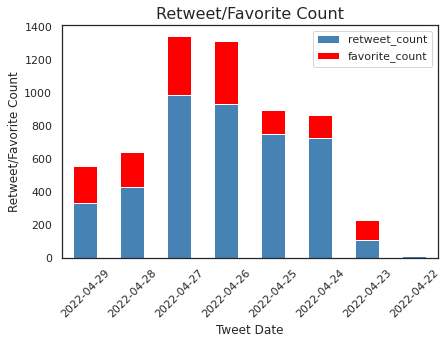

In [ ]:
#when trend started in each place - using retweet count and favourite count (Stacked bar!)
#retweet
#favourite

#create DataFrame
df = pd.DataFrame({"retweet_count": [337, 431, 987, 932, 751, 726, 113, 17],
"dates" : ["2022-04-29","2022-04-28","2022-04-27","2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22"],
 "favorite_count": [221, 214, 354, 381, 147, 137, 119, 5]})
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
df.set_index('dates').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Retweet/Favorite Count', fontsize=16)

#add axis titles
plt.xlabel('Tweet Date')
plt.ylabel('Retweet/Favorite Count')

#rotate x-axis labels
plt.xticks(rotation=45)


In [ ]:
#What devices were used to tweet?
from twython import Twython
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)   
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
query = {'q': 'Neil Parish',
         'result_type': 'mixed',
         'count': 100, 'lang': 'en', 'until': '2022-05-03'}
sample_return = python_tweets.search(**query)
dict_={'user': [], 'date':[], 'text': [], 'source': []}
for status in python_tweets.search(**query) ['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['source'].append(status['source'])
df = pd.DataFrame(dict_)
#df.sort_values(by='favorite_count', inplace = True, ascending =False)
#df.head(5)
df
#cleaning the data 
def cleanTxt(cTx):
  cTx = re.sub(r'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iphone', cTx) #Remove @mentions
  cTx = re.sub(r'<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'iPad', cTx)
  cTx = re.sub(r'<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'Twitter Web App', cTx)
  cTx = re.sub(r'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', cTx)
  cTx = re.sub(r'<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'Twitter Media Studio', cTx)
  cTx = re.sub(r'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'Andriod', cTx)
  cTx = re.sub(r'<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>', 'WordPress', cTx)
  #cTx = re.sub(r'<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'Twitter Media Studio', cTx)
  #cTx = re.sub(r'<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'Twitter Media Studio', cTx)
  return cTx
#cleaning the text
df['source'] = df['source'].apply(cleanTxt)
#show the cleaned text
df



,user,date,text,source
0,Pundamentalism,Mon May 02 18:31:06 +0000 2022,I just hope Neil Parish’s wife decides not to ...,iphone
1,mrjamesob,Sat Apr 30 18:17:57 +0000 2022,"Tractor jokes aside, Neil Parish broke no laws...",iphone
2,benrileysmith,Sat Apr 30 12:03:09 +0000 2022,Worth noting the Tories only said they’d remov...,iphone
3,AspieMum,Mon May 02 23:59:48 +0000 2022,Tories head into local elections with porn MP ...,Andriod
4,_layback,Mon May 02 23:58:25 +0000 2022,"RT @mrjamesob: Tractor jokes aside, Neil Paris...",Andriod
...,...,...,...,...
95,TopDownPopes,Mon May 02 22:28:35 +0000 2022,RT @dandouglas: Neil Parish MP crashes a tract...,Andriod
96,changekitchen,Mon May 02 22:27:58 +0000 2022,RT @SianHolland141: @davidwulff @RebeccaJJules...,iphone
97,toadmeister,Mon May 02 22:27:27 +0000 2022,"In this week’s @calling_podcast, @JamesDelingp...",TweetDeck
98,changekitchen,Mon May 02 22:26:34 +0000 2022,"RT @benrileysmith: EXCLUSIVE\n\nNeil Parish, T...",iphone


In [ ]:
#iPhone
df_filtered = df[(df['source']=='iphone')]
df_filtered

#33

,user,date,text,source
2,LoriAnn67684082,Tue Apr 26 20:35:37 +0000 2022,RT @Jura_Harris: @HaveringDaily @AAGR_UK @Glor...,iphone
3,BadgerLiberal,Tue Apr 26 19:30:18 +0000 2022,@PaulCogan Awful. Hidden and massively covered...,iphone
8,AAGR_UK,Tue Apr 26 17:45:23 +0000 2022,@HaveringDaily @GloriaDePiero @AndrewRosindell...,iphone
9,milarum1,Tue Apr 26 17:35:04 +0000 2022,@HaveringDaily @AAGR_UK @GloriaDePiero @Andrew...,iphone
10,milarum1,Tue Apr 26 17:30:02 +0000 2022,@HaveringDaily @AAGR_UK @GloriaDePiero @Andrew...,iphone
12,AAGR_UK,Tue Apr 26 17:25:15 +0000 2022,@HaveringDaily @GloriaDePiero @AndrewRosindell...,iphone
17,_Run1000,Tue Apr 26 10:10:08 +0000 2022,RT @d_christianrose: Good luck to all witnesse...,iphone
24,mum_pumpkin,Mon Apr 25 23:50:36 +0000 2022,RT @AAGR_UK: Thanks to @thetimes for covering ...,iphone
26,jonwil59,Mon Apr 25 21:04:49 +0000 2022,RT @AAGR_UK: Thanks to @thetimes for covering ...,iphone
28,TrunkyBun,Mon Apr 25 20:50:05 +0000 2022,RT @AAGR_UK: Thanks to @thetimes for covering ...,iphone


In [ ]:
#Twitter Web App
df_filtered = df[(df['source']=='Twitter Web App')]
df_filtered
#23

,user,date,text,source
4,morourke1951_o,Tue Apr 26 19:08:35 +0000 2022,RT @Jura_Harris: @HaveringDaily @AAGR_UK @Glor...,Twitter Web App
5,GreyhAwarenCork,Tue Apr 26 19:00:33 +0000 2022,RT @Jura_Harris: @HaveringDaily @AAGR_UK @Glor...,Twitter Web App
6,GreyhAwarenCork,Tue Apr 26 19:00:13 +0000 2022,RT @AAGR_UK: @HaveringDaily @GloriaDePiero @An...,Twitter Web App
13,HaveringDaily,Tue Apr 26 16:51:09 +0000 2022,@AAGR_UK @GloriaDePiero @AndrewRosindell @Grey...,Twitter Web App
14,GREY2KUSA,Tue Apr 26 14:39:23 +0000 2022,RT @AAGR_UK: Thanks to @thetimes for covering ...,Twitter Web App
18,neil_parish,Tue Apr 26 09:54:00 +0000 2022,RT @DHSCgovuk: People aged 75 and over are bei...,Twitter Web App
20,d_christianrose,Tue Apr 26 09:21:57 +0000 2022,Good luck to all witnesses. An important issue...,Twitter Web App
23,fifeenv,Tue Apr 26 05:34:44 +0000 2022,RT @AAGR_UK: Thanks to @thetimes for covering ...,Twitter Web App
25,GreyhAwarenCork,Mon Apr 25 21:35:38 +0000 2022,RT @AAGR_UK: Thanks to @thetimes for covering ...,Twitter Web App
33,AAGR_UK,Mon Apr 25 20:31:57 +0000 2022,Thanks to @thetimes for covering this importan...,Twitter Web App


In [ ]:
#TweetDeck
df_filtered = df[(df['source']=='TweetDeck')]
df_filtered
#0

In [ ]:
#wordPress
df_filtered = df[(df['source']=='WordPress')]
df_filtered
#0

In [ ]:
#iPad
df_filtered = df[(df['source']=='iPad')]
df_filtered
#10

In [ ]:
#Android
df_filtered = df[(df['source']=='Andriod')]
df_filtered
#44

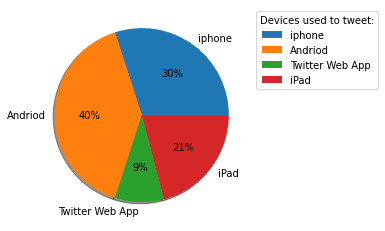

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#define data
y = np.array([33, 44, 10, 23])
mylabels = ['iphone','Andriod','Twitter Web App', 'iPad']
#myexplode = [0.2, 0.2, 0.3,0.2]

#create piechart
plt.pie(y, labels = mylabels,shadow = True,autopct='%.0f%%')
plt.legend(title = "Devices used to tweet:",bbox_to_anchor=(1,1), loc="upper left")
plt.show() 

In [ ]:
#Sources we can trust - verified status
from twython import Twython
import json

with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
   
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])


#query = {'q': 'Neil Parish',
       #'result_type': 'popular', 'count': 100, 'lang': 'en',}

query = {'q': 'Neil Parish',
         'result_type': 'mixed',
         'count': 100, 'lang': 'en', 'until': '2022-04-29'}
sample_return = python_tweets.search(**query)


dict_={'user': [],'Verified_status':[]}
for status in python_tweets.search(**query) ['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['Verified_status'].append(status['user']['verified'])
df = pd.DataFrame(dict_)
df.sort_values(by='Verified_status', inplace = True, ascending =False)
df 

In [ ]:
#Sources we can trust - followers count
from twython import Twython
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
    python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
query = {'q': 'Neil Parish',
         'result_type': 'mixed',
         'count': 100, 'lang': 'en', 'until': '2022-04-29'}
sample_return = python_tweets.search(**query)
dict_={'user': [], 'followers_count':[]}
for status in python_tweets.search(**query) ['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['followers_count'].append(status['user']['followers_count'])
df = pd.DataFrame(dict_)
df.sort_values(by='followers_count', inplace = True, ascending =False)
df = df.drop(df.index [ [ 7,8,9] ])
df = df.head(6)
df


In [ ]:
#sources to trust -followers count - word cloud
allWords = ' '.join([twts for twts in df['user']])
wordCloud = WordCloud(width = 500, height = 300, background_color= 'white' ,random_state = 21, max_font_size = 209).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
my_colors = list((['b', 'r', 'g', 'y', 'k']))
barC = df.plot(kind = 'bar', x='user', y='followers_count',rot=90, figsize=(16, 8),stacked=True, color = my_colors, legend=False)
barC.set_title("Users Followers Count")
barC.set_ylabel("Number of Followers")

In [ ]:
#Streaming data for sentiment analysis

from twython import TwythonStreamer
import csv
import json

with open('twitter_credentials.json','r') as file:
    creds = json.load(file)

def process_tweet(tweet):
    d = {}
    d['hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user_screenName'] = tweet['user']['screen_name']
    d['user_name'] = tweet['user']['name']
    d['user_loc'] = tweet['user']['location']
    d['source'] = tweet['source']
    d['verified'] = tweet['user']['verified']
    d['created_at'] = tweet['created_at']
    d['followers'] = tweet['user']['followers_count']
    d['retweet'] = tweet['retweet_count']
    d['coordinates'] = tweet['coordinates']
    return d

#Create class that inherits TwythonStreamer
class MyStreamer(TwythonStreamer):
    #recieved data
    def on_success(self,data):
        if data['lang'] == 'en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)
            
    def on_error(self,status_code, data):
        print(status_code, data)
        self.disconnect()
        
    def save_to_csv(self,tweet):
        with open (r'NeilParish.csv','a', encoding = 'utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))
#load credentials
stream = MyStreamer(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
stream.statuses.filter(track='Neil Parish')


KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv("NeilParish.csv",
                  names=["hashtags", "text", "user_screenName", "user_name","user_loc", "source", "verified", "created_at", "followers", "retweet", "coordinates"])
df

,hashtags,text,user_screenName,user_name,user_loc,source,verified,created_at,followers,retweet,coordinates
0,[],RT @BarbaraSutton15: Has Tractor Man Neil Pari...,OfParvati,House of Parvati,"Scotland, United Kingdom","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,Wed May 04 19:18:03 +0000 2022,294,0,NaN
1,[],@kermode111 @ServicetechDave 11 April - Tory M...,Ojay10351605,Ojay,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Wed May 04 19:18:38 +0000 2022,73,0,NaN
2,[],RT @BBCNews: Porn-watching MP Neil Parish form...,moloit6,LIVING BY FAITH,,"<a href=""http://twitter.com/download/android"" ...",False,Wed May 04 19:18:39 +0000 2022,555,0,NaN
3,"['VoteToryCouncilsOut', 'ToriesPartiedWhilePeo...",RT @dawnbensonart: I’m sick to death of the ev...,AlixChaytor,Alix Chaytor 💙💜🧡 #FBPA #FBPE #StandWithUkraine,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Wed May 04 19:18:57 +0000 2022,4622,0,NaN
4,[],@lordster1 @ServicetechDave 11 April - Tory MP...,Ojay10351605,Ojay,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Wed May 04 19:19:03 +0000 2022,73,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783,[],"RT @CentralReserva9: Jacqui Smith, former Labo...",F00tsie,F00tsie #Back Boris,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,Sun May 08 21:30:09 +0000 2022,532,0,NaN
784,[],@GraemeRossiter2 @florencerounda2 @HackedOffHu...,ChewyBB,Ron Burgundy - GBeebies News,GB News,"<a href=""http://twitter.com/download/android"" ...",False,Sun May 08 21:39:10 +0000 2022,7829,0,NaN
785,[],PM’s strategist attacks female MPs over Neil P...,davidh7426,David V Humphreys,"Stockport, Uk","<a href=""http://twitter.com/download/android"" ...",False,Sun May 08 21:54:27 +0000 2022,18292,0,NaN
786,[],RT @davidh7426: PM’s strategist attacks female...,KelsallDaniel,Daniel Kelsall🏴󠁧󠁢󠁥󠁮󠁧󠁿🇬🇧,United Kingdom🏴󠁧󠁢󠁥󠁮󠁧󠁿,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,Sun May 08 21:58:04 +0000 2022,318,0,NaN


In [ ]:
#sentiment analysis
tweet =  df.text
df = pd.DataFrame(tweet)
df

,text
0,RT @BarbaraSutton15: Has Tractor Man Neil Pari...
1,@kermode111 @ServicetechDave 11 April - Tory M...
2,RT @BBCNews: Porn-watching MP Neil Parish form...
3,RT @dawnbensonart: I’m sick to death of the ev...
4,@lordster1 @ServicetechDave 11 April - Tory MP...
...,...
783,"RT @CentralReserva9: Jacqui Smith, former Labo..."
784,@GraemeRossiter2 @florencerounda2 @HackedOffHu...
785,PM’s strategist attacks female MPs over Neil P...
786,RT @davidh7426: PM’s strategist attacks female...


In [ ]:
#Clean text - sentiment analysis

def cleantext(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  text = re.sub(r'#','', text) # removes #
  text = re.sub(r'RT[\s]+', '', text)#removes RT
  text = re.sub(r'https?:/\/\S+', '', text)#removes hhtp
  return text
df['text'] = df['text'].apply(cleantext)
df



,text
0,: Has Tractor Man Neil Parish only resigned to...
1,11 April - Tory MP Imran Khan guilty of chil...
2,: Porn-watching MP Neil Parish formally resigns
3,: I’m sick to death of the evil monsters! Get ...
4,11 April - Tory MP Imran Khan guilty of chil...
...,...
783,": Jacqui Smith, former Labour Home Secretary h..."
784,X rated\n
785,PM’s strategist attacks female MPs over Neil P...
786,: PM’s strategist attacks female MPs over Neil...


In [ ]:
#Create a function to get the subjectivity
#subjectivity - tells how subjective the text/opinion is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
#polarity tells how positive or negative a text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
 
#create two new columns
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

#show the new dataframe
df

,text,Subjectivity,Polarity
0,: Has Tractor Man Neil Parish only resigned to...,1.000000,0.000000
1,11 April - Tory MP Imran Khan guilty of chil...,1.000000,-0.500000
2,: Porn-watching MP Neil Parish formally resigns,0.000000,0.000000
3,: I’m sick to death of the evil monsters! Get ...,0.928571,-0.857143
4,11 April - Tory MP Imran Khan guilty of chil...,1.000000,-0.500000
...,...,...,...
783,": Jacqui Smith, former Labour Home Secretary h...",0.000000,0.000000
784,X rated\n,0.000000,0.000000
785,PM’s strategist attacks female MPs over Neil P...,0.183333,-0.234375
786,: PM’s strategist attacks female MPs over Neil...,0.183333,-0.234375


In [ ]:
#Create a function to compute the negative, neautral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,text,Subjectivity,Polarity,Analysis
0,: Has Tractor Man Neil Parish only resigned to...,1.000000,0.000000,Neutral
1,11 April - Tory MP Imran Khan guilty of chil...,1.000000,-0.500000,Negative
2,: Porn-watching MP Neil Parish formally resigns,0.000000,0.000000,Neutral
3,: I’m sick to death of the evil monsters! Get ...,0.928571,-0.857143,Negative
4,11 April - Tory MP Imran Khan guilty of chil...,1.000000,-0.500000,Negative
...,...,...,...,...
783,": Jacqui Smith, former Labour Home Secretary h...",0.000000,0.000000,Neutral
784,X rated\n,0.000000,0.000000,Neutral
785,PM’s strategist attacks female MPs over Neil P...,0.183333,-0.234375,Negative
786,: PM’s strategist attacks female MPs over Neil...,0.183333,-0.234375,Negative


In [ ]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+')'+sortedDF['text'][i])
    print()
    j=j+1

1)  11 April - Tory MP Imran Khan guilty of child sex assault

17 April - Tory MP Andrew B… 

2): I’m sick to death of the evil monsters! Get them Out! VoteToryCouncilsOut ToriesPartiedWhilePeopleDied ToriesDeviodOf…

3)  11 April - Tory MP Imran Khan guilty of child sex assault

17 April - Tory MP Andrew Br… 

4): The old Tory trick of hiding in plain sight, just like Johnson and Saville before him. 

TorySleaze ToriesOut5thMay to…

5)Blocked by Boris, now he’s killed of Rishi he’s blocking as much as he can anyone capable of taking over. Nasty pol… 

6)Does anyone know whether the horny Tory Mr Neil Parish will be running for erection, I mean election?

7)Question: What have Neil Parish and 'Hand of God' got in common?

8)  This is what you call ACTUAL NEWS BREAKING. Tory MP Neil Parish forced to resign for t… 

9)Porn MP Neil Parish Formally Stands Down 
 

10): Porn MP Neil Parish Formally Stands Down 
 

11): Porn MP Neil Parish Formally Stands Down 
 

12): Poor Neil Parish, bein

In [ ]:
Positive = df[df['Analysis']== "Positive"]
Negative = df[df['Analysis']== "Negative"]
Neutral = df[df['Analysis']== "Neutral"]



In [ ]:
Positive

,text,Subjectivity,Polarity,Analysis
7,: Did Neil Parish watch the full tractor porn ...,0.550000,0.350000,Positive
8,: If Neil Parish has the Whip removed &amp; fo...,0.544444,0.100000,Positive
9,_Maguire: Neil “porn” Parish is the first MP t...,0.416667,0.375000,Positive
11,Conservative Neil Parish resigns for watching...,0.200000,0.200000,Positive
16,: How’s that for a ‘happy ending’? 😏\n\n(yes I...,1.000000,0.800000,Positive
...,...,...,...,...
749,They’re playing near Plympton soon. \n\nWonder...,0.400000,0.100000,Positive
764,: Loving the new quiz show on MinistryofOffen...,0.702273,0.368182,Positive
765,: Watch the full episode of Ministry of Offenc...,0.550000,0.350000,Positive
780,‘Beer and cake’ is not the distraction.\n\nR...,1.000000,0.250000,Positive


In [ ]:
def visualiser(data):
    fdist = nltk.FreqDist()
    en_stop = set(stopwords.words('english'))
    for i in data["text"]:
      i = re.sub(r"[^a-zA-Z0-9]+"," ", i)
      i = nltk.word_tokenize(i)
      stopped_tokens = [t for t in i if not t in en_stop]
      for j in stopped_tokens:
        fdist[j] +=1
    fdist.plot(30, cumulative=False)
    
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="white").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

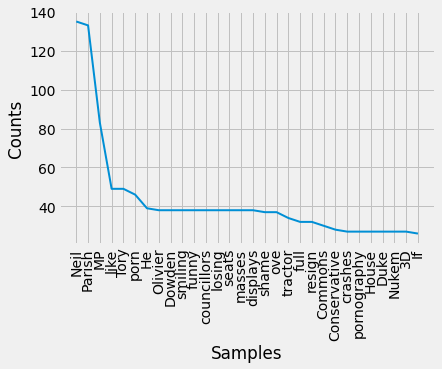

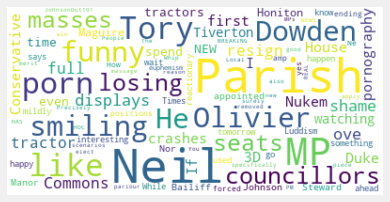

In [ ]:
visualiser(Positive)

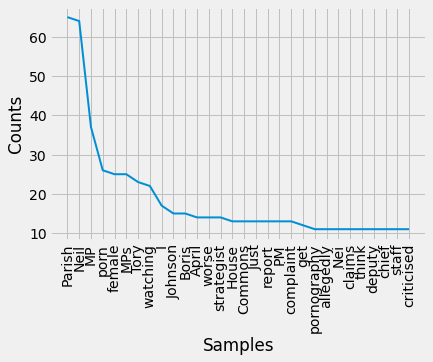

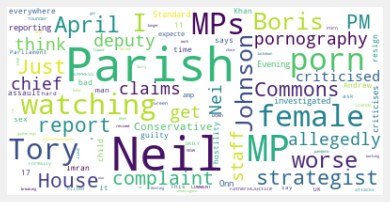

In [ ]:
visualiser(Negative)

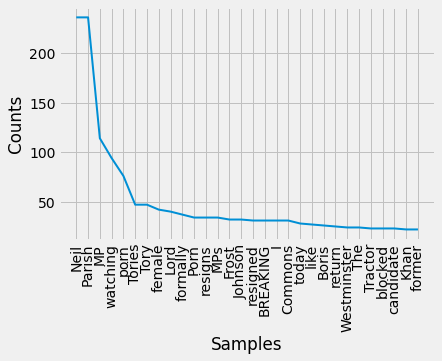

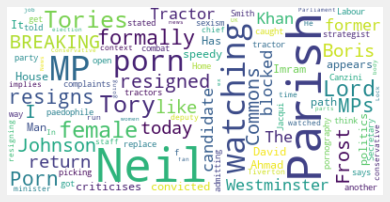

In [ ]:
visualiser(Neutral)

In [ ]:
#print all positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
 if (sortedDF['Analysis'][i] == 'Positive'):
  print(str(j) + ')'+sortedDF['text'][i])
 
  #print()
  j=j+1
  

1): Did Neil Parish watch the full tractor porn film or just look at the trailer?
2): If Neil Parish has the Whip removed &amp; forced to resign for watching porn in the HOC, then surely it should also apply…
3)_Maguire: Neil “porn” Parish is the first MP to resign to spend more time with his tractors.
4) Conservative Neil Parish resigns for watching legal porn.
Elected as a Labour MP, Claudia Webbe stays on d… 
5): How’s that for a ‘happy ending’? 😏

(yes I know that’s a euphemism specifically used in massage parlour scenarios, but…
6): How’s that for a ‘happy ending’? 😏

(yes I know that’s a euphemism specifically used in massage parlour scenarios, but…
7): NEW:

Neil Parish, Conservative MP for Tiverton and Honiton has been appointed Steward and Bailiff of the Manor of Nor…
8)_Maguire: Neil “porn” Parish is the first MP to resign to spend more time with his tractors.
9)_Maguire: Neil “porn” Parish is the first MP to resign to spend more time with his tractors.
10)   Who actually has

In [ ]:
sortedDF = sortedDF[sortedDF['Analysis'].str.contains('Positive')]
#print(sortedDF)
sortedDF.text
words = nltk.word_tokenize(sortedDF)

In [ ]:
sortedDF = df.sort_values(by=['Polarity'])
sortedDF = sortedDF.text
sortedDF

In [ ]:
#print the neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Neutral'):
   neu =  print(str(j)+')'+sortedDF['text'][i])
   print()
   j=j+1

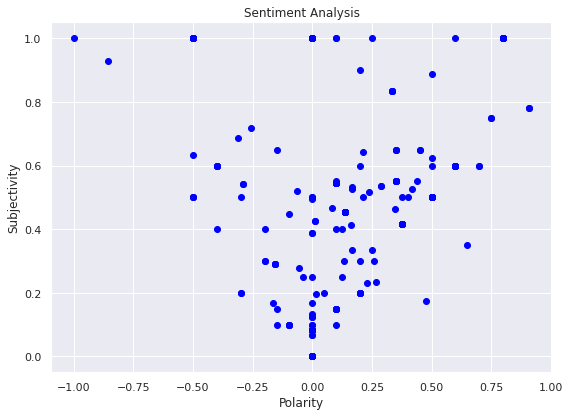

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

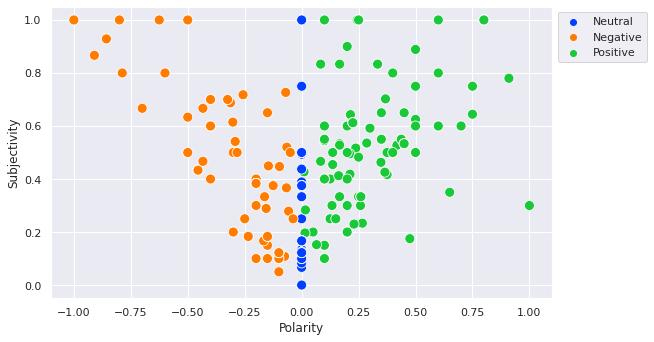

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(8, 5))    
palette = sns.color_palette("bright", 3)
g = sns.scatterplot(ax=ax, x="Polarity", y="Subjectivity", hue="Analysis", marker='o', data=df, s=100, palette= palette)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
#g.set(xlim = (50000,250000))

In [ ]:
#get the percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['text']
ptweets
round( (ptweets.shape[0] /df.shape[0]) * 100 , 1)

35.3

In [ ]:
#get the percentage of negative tweets
ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['text']
ntweets
round( (ntweets.shape[0] /df.shape[0]) * 100 , 1)

14.2

In [ ]:
#get the percentage of neutral tweets
nntweets = df[df.Analysis=='Neutral']
nntweets = nntweets['text']
nntweets
round( (nntweets.shape[0] /df.shape[0]) * 100 , 1)

50.5

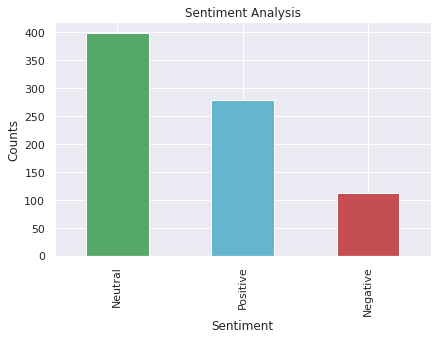

In [ ]:
#show the value count
df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = list('gcrymc'))

plt.show()

In [ ]:
#Heat map
import pandas as pd
import seaborn as sns
import re
from twython import Twython
import json
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
import gmplot
import webbrowser

In [ ]:
with open('twitter_credentials.json','r') as file:
    creds = json.load(file)

python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

dates =["2022-05-06","2022-05-05","2022-05-04","2022-05-03","2022-05-02","2022-05-01","2022-04-30","2022-04-29"]

dict_test = {'user':[], 'date':[], 'text':[], 'favorite_count': [], 'location': [], 'verified':[], 
         'protected':[], 'retweet':[], 'source':[], 'coordinates':[], 'timezone':[],
         'geo':[], 'place':[], 'Followers':[], 'Account Created': []}
for i in dates:
    query = {'q' : 'Neil Parish', 'result_type' : 'mixed', 'count' : 100, 'lang' : 'en', "until":i}
    sample_return = python_tweets.search(**query)    
    for status in python_tweets.search(**query)['statuses']:
        dict_test['user'].append(status['user']['screen_name'])
        dict_test['date'].append(status['created_at'])
        dict_test['text'].append(status['text'])
        dict_test['favorite_count'].append(status['favorite_count'])
        dict_test['location'].append(status['user']['location'])
        dict_test['verified'].append(status['user']['verified'])
        dict_test['protected'].append(status['user']['protected'])
        dict_test['retweet'].append(status['retweet_count'])
        dict_test['source'].append(status['source'])
        dict_test['coordinates'].append(status['coordinates'])
        dict_test['timezone'].append(status['user']['time_zone'])
        dict_test['geo'].append(status['geo'])
        dict_test['place'].append(status['place'])
        dict_test['Followers'].append(status['user']['followers_count'])
        dict_test['Account Created'].append(status['user']['created_at'])
    print(len(sample_return['statuses']))

100
100
100
100
100
100
100
3


In [ ]:
df_test2 = pd.DataFrame(dict_test)

In [ ]:
#df_test2 = pd.read_csv("new shiz.csv")
#df_test2 = df_test2.drop(['Unnamed: 0'],axis =1)

df_test2['date']= pd.to_datetime(df_test2['date'])
df_test2['Tweet Created'] = df_test2['date'].dt.date

df_test2['Account Created']= pd.to_datetime(df_test2['Account Created'])
df_test2['Date Account Created'] = df_test2['Account Created'].dt.date

df_test2['Account Age'] = df_test2['Tweet Created'] - df_test2['Date Account Created']
df_test2['Account Age'] = df_test2['Account Age'].astype(str)
df_test2.sort_values(by='Account Age', inplace = True, ascending = True)


In [ ]:
#When does the trend starts?
a = df_test2.groupby(['Tweet Created']).sum()
a['date'] = a.index
a.plot(x="date", y=["retweet", "favorite_count"], kind="bar")
plt.xticks(rotation=45)


a.plot(x="date", y=["retweet", "favorite_count"], kind="line")
plt.xticks(rotation=45)

#What devices are used?
source_count = df_test2['source'].value_counts()

source_plot = pd.DataFrame(source_count)
source_plot = source_plot.rename(columns={"source": "count"})
source_plot['Source'] = source_plot.index

In [ ]:
#Cleaning the source using Regex
temp = []
for i in source_plot['Source']:
    a = re.findall(">.*\w.<", i)
    temp.append(a)
temp = pd.DataFrame(temp)

#Removing the first and last character of the source
source_clean = []
for i in temp[0]:
    source_clean.append(i[1:-1])

source_plot = list(zip(source_count, source_clean))
source_plot = pd.DataFrame(source_plot, columns = ['Count', 'Source Clean'])
sns.barplot(x="Count", y="Source Clean", data = source_plot).set(ylabel = 'Devices')


In [ ]:
#Which source to trust
verified = df_test2['verified'].value_counts()
colors = sns.color_palette('pastel')
# create pie chart using matplotlib
plt.pie(verified, labels=['Unverified', 'Verified'], colors=colors, autopct='%.0f%%')
plt.title("Percentage of Verified Accounts")
plt.show()

verified_sum = df_test2.groupby(['verified']).sum()
verified_sum['verified'] = verified_sum.index

verified_sum.plot(x="verified", y=["favorite_count","retweet"], kind="bar")
plt.xticks(rotation=0)

sns.barplot(x = "Followers", y = "verified", data = verified_sum)
verified_sum.plot(x = "verified", y="Followers", kind="bar")

#Cleaning Account Age
df_test2['Account Age Clean'] = df_test2['Account Age'].str.extract('(\d+)')
df_test2['Account Age Clean'] = df_test2['Account Age Clean'].astype(int)

sns.lineplot(x = "Account Age Clean", y = "Followers", data = df_test2).set(xlabel = "Account Age")
sns.histplot(data=df_test2, x="Account Age Clean").set(xlabel = "Account Age")


In [ ]:
#Location of the trend
Location = df_test2['location']
Location = Location.dropna()

    
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

Location_clean = []
for i in Location:
    Location_clean.append(remove_emoji(i))

geolocator = Nominatim(user_agent="geo")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    
Location_test = []
for i in Location_clean:
    Location_test.append(geolocate(i))



In [ ]:
Location_test

In [ ]:
Location_test = [x for x in Location_test if str(x) != 'nan']
Location_test = pd.DataFrame(Location_test, columns=["Latitude", 'Longitude'])
Location_test = Location_test.dropna()
Lat = Location_test['Latitude']
Long = Location_test['Longitude']
map_plot = gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 3)
map_plot.heatmap(Lat, Long)
map_plot.draw("test.html")
webbrowser.open_new_tab("test.html")

False